# Исследование надежности заемщиков


## Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сначала посчитаем сколько всего получено кредитов людьми с разным количеством детей. Сохраним результаты в переменной `children_grouped`:

In [22]:
children_grouped=data['children'].value_counts()
children_grouped.reset_index()

,index,children
0,0,14091
1,1,4808
2,2,2052
3,3,330
4,4,41
5,5,9


Теперь посчитаем сколько было невозвратов у клиентов с разным количеством детей. Сохраним результаты в переменной `children_debt_grouped`:

In [23]:
children_debt_grouped=data.groupby('children')['debt'].sum()
children_debt_grouped.reset_index()

,children,debt
0,0,1063
1,1,444
2,2,194
3,3,27
4,4,4
5,5,0


Найдем относительную величину невозвратов `children_debt_otn` для клиентов с разным количеством детей:

In [24]:
children_debt_otn=children_debt_grouped/children_grouped
children_debt_otn.reset_index()

,children,0
0,0,0.075438
1,1,0.092346
2,2,0.094542
3,3,0.081818
4,4,0.097561
5,5,0.000000


Аналогично через сводную таблицу:

In [25]:
data_ch_pivot = pd.pivot_table(data, index=['children'], values=['debt'])
data_ch_pivot.reset_index()

,children,debt
0,0,0.075438
1,1,0.092346
2,2,0.094542
3,3,0.081818
4,4,0.097561
5,5,0.000000


Добавим в таблицу остальные признаки для наглядонсти: количество заемщиков и невозвратов в каждой группе.

In [26]:
data_ch_pivot['children_grouped']=data['children'].value_counts()
data_ch_pivot['children_debt_grouped']=data.groupby('children')['debt'].sum()
data_ch_pivot.reset_index()

,children,debt,children_grouped,children_debt_grouped
0,0,0.075438,14091,1063
1,1,0.092346,4808,444
2,2,0.094542,2052,194
3,3,0.081818,330,27
4,4,0.097561,41,4
5,5,0.000000,9,0


Поменяем столбцы местами, чтобы таблица была более понятной.

In [27]:
data_ch_pivot_new = data_ch_pivot.reindex(columns=['children_grouped', 'children_debt_grouped', 'debt']).reset_index()
data_ch_pivot_new

,children,children_grouped,children_debt_grouped,debt
0,0,14091,1063,0.075438
1,1,4808,444,0.092346
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


Импортируем `Seaborn` и `matplotlib.pyplot` и построим точечную диаграмму.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество невозвратов, отн.')

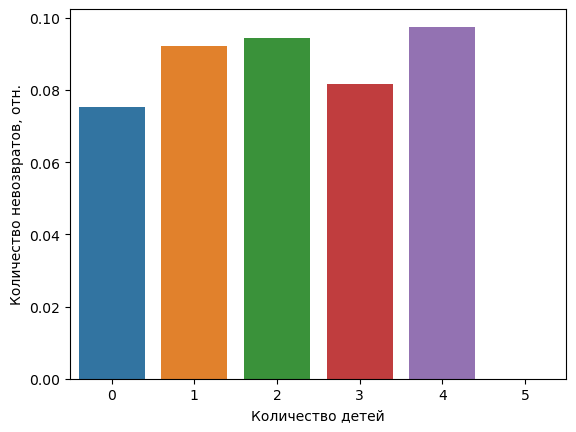

In [29]:
sns.barplot(
    data=data_ch_pivot_new, 
    x='children', 
    y='debt') 
plt.xlabel('Количество детей')
plt.ylabel('Количество невозвратов, отн.')

На первый взгляд, можно сделать вывод, что заемщики с пятью детьми не имеют задолжностей по кредитам. Но таких человек всего 9 во всей базе — это ничтожно малое количество, которым можно пренебречь. Уберем эту строку из таблицы и построим график заново.

In [30]:
data_ch_pivot_new_before5=data_ch_pivot_new.drop(data_ch_pivot_new.index[5])
data_ch_pivot_new_before5.reset_index()

,index,children,children_grouped,children_debt_grouped,debt
0,0,0,14091,1063,0.075438
1,1,1,4808,444,0.092346
2,2,2,2052,194,0.094542
3,3,3,330,27,0.081818
4,4,4,41,4,0.097561


(0.07, 0.1)

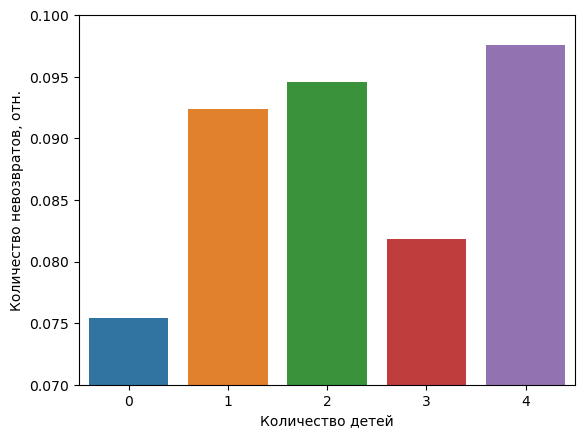

In [31]:
sns.barplot(
    data=data_ch_pivot_new_before5, 
    x='children', 
    y='debt') 
plt.xlabel('Количество детей')
plt.ylabel('Количество невозвратов, отн.')
plt.ylim(0.07,0.10)

**Вывод:** Теперь разброс значений более нагляден. Мы видим, что наименьший процент невозвратов у заемщиков без детей, либо с количеством детей равным трем. Линейной зависимости между количеством детей и вероятностью невозврата кредита не наблюдается.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Посчитаем сколько всего получено кредитов людьми с разным семейным положением. Сохраним результаты в переменной `family_status_grouped`:

In [32]:
family_status_grouped=data['family_status'].value_counts()
family_status_grouped.reset_index()

,index,family_status
0,женат / замужем,12261
1,гражданский брак,4134
2,Не женат / не замужем,2796
3,в разводе,1189
4,вдовец / вдова,951


Построим сводную таблицу:

In [33]:
data_f_pivot = pd.pivot_table(data, index=['family_status'], values=['debt'])
data_f_pivot['family_status_grouped']=data['family_status'].value_counts()
data_f_pivot['family_status_debt_grouped']=data.groupby('family_status')['debt'].sum()
data_f_pivot_new = data_f_pivot.reindex(columns=['family_status_grouped', 'family_status_debt_grouped', 'debt'])
data_f_pivot_new.reset_index() # Ваш код будет здесь. Вы можете создавать новые ячейки.

,family_status,family_status_grouped,family_status_debt_grouped,debt
0,Не женат / не замужем,2796,273,0.097639
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246
3,гражданский брак,4134,385,0.093130
4,женат / замужем,12261,927,0.075606


Text(0, 0.5, 'Количество невозвратов, отн.')

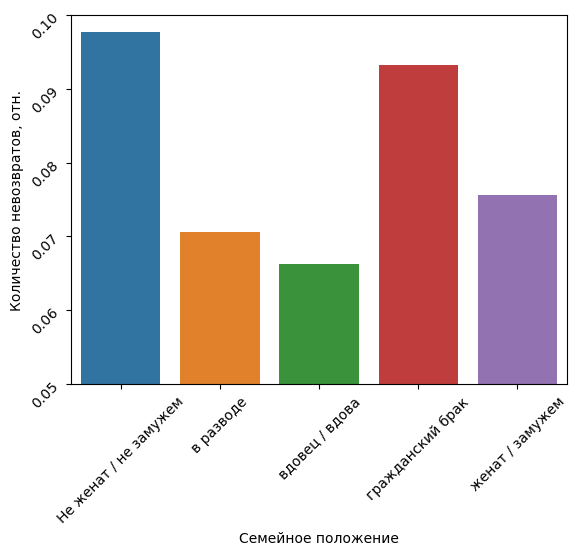

In [34]:
sns.barplot(
    data=data_f_pivot.reset_index(), 
    x='family_status', 
    y='debt') 
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0.05,0.10)
plt.xlabel('Семейное положение')
plt.ylabel('Количество невозвратов, отн.')

**Вывод:** Как видим из сводной таблицы, клиенты не состоящие в браке, либо живущие гражданским браком, чаще не возвращают кредиты.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

##### Вариант 1

Для начала посмотрим, минимальные, максимальные и меданные месячные доходы клиентов:

In [35]:
print(data['total_income'].min())
print(data['total_income'].max())
print(int(data['total_income'].median()))# Ваш код будет здесь. Вы можете создавать новые ячейки.

20667
2265604
142594


Видим, что основная часть клиентов имеет доход в районе 140000 рублей в месяц.

Объединим данные в категории на основе уровня дохода. Разобьем категории на основе данной таблицы ![Разделение уровня дохода по категориям](https://i0.u-mama.ru/d58/401/803/32c0cb0fa59cc20fd0eea942eb87ed19.jpg):



Получим следующие группы (начнем с дохода от 20000 рублей, т.к. минимальный доход в таблице, как мы определилил, равен 20667 рублей):
- "20-30 тыс.руб" - для клиентов с доходом от 20 до 30 тысяч рублей в месяц;
- "30-60 тыс.руб" - для клиентов с доходом от 30 до 60 тысяч рублей в месяц;
- "60-90 тыс.руб" - для клиентов с доходом от 60 до 90 тысяч рублей в месяц;
- "90-150 тыс.руб" - для клиентов с доходом от 90 до 150 тысяч рублей в месяц;
- "свыше 150 тыс.руб" - для клиентов с доходом от 150 тысяч рублей в месяц.

С помощью функции создадим новый столбец `total_income_grouped` в таблице:

In [36]:
def total_income_group(total_income):
    if 20000 <= total_income < 30000:
        return '20-30 тыс.руб'
    if 30000 <= total_income < 60000:
        return '30-60 тыс.руб'
    if 60000 <= total_income < 90000:
        return '60-90 тыс.руб'
    if 90000 <= total_income < 150000:
        return '90-150 тыс.руб'
    if total_income >= 150000:
        return 'свыше 150 тыс.руб'
    return 'менее 20 тыс.руб'
data['total_income_grouped']=data['total_income'].apply(total_income_group) 

Посмотрим сколько клиентов  вкаждой группе.

In [37]:
data['total_income_grouped'].value_counts()

свыше 150 тыс.руб    9777
90-150 тыс.руб       8221
60-90 тыс.руб        2532
30-60 тыс.руб         779
20-30 тыс.руб          22
Name: total_income_grouped, dtype: int64

Видим, что группа с доходом 20-30 тыс. рублей очень маленькая - объединим две группы "20-30 тыс.руб" и "30-60 тыс.руб" в одну "20-60 тыс.руб". Так же видим, что в группах "90-150 тыс.руб" и "свыше 150 тыс.руб" сконцентрированна основная часть клиентов. Добавим еще проежуточные группы. В итоге новая группировка будет выглядеть так:
- "20-60 тыс.руб" - для клиентов с доходом от 20 до 60 тысяч рублей в месяц;
- "60-90 тыс.руб" - для клиентов с доходом от 60 до 90 тысяч рублей в месяц;
- "90-120 тыс.руб" - для клиентов с доходом от 90 до 120 тысяч рублей в месяц;
- "120-150 тыс.руб" - для клиентов с доходом от 120 до 150 тысяч рублей в месяц;
- "150-180 тыс.руб" - для клиентов с доходом от 150 до 180 тысяч рублей в месяц;
- "свыше 180 тыс.руб" - для клиентов с доходом от 180 тысяч рублей в месяц.

Пересоздадим столбец `total_income_grouped` в таблице и посмотрим сколько клиентов окажется в каждой группе:

In [38]:
def total_income_group(total_income):
    if 20000 <= total_income < 60000:
        return '20-60 тыс.руб'
    if 60000 <= total_income < 90000:
        return '60-90 тыс.руб'
    if 90000 <= total_income < 120000:
        return '90-120 тыс.руб'
    if 120000 <= total_income < 150000:
        return '120-150 тыс.руб'
    if 150000 <= total_income < 180000:
        return '150-180 тыс.руб'
    if total_income >= 180000:
        return 'свыше 180 тыс.руб'
    return 'менее 20 тыс.руб'
data['total_income_grouped']=data['total_income'].apply(total_income_group) 
data['total_income_grouped'].value_counts()

свыше 180 тыс.руб    6389
120-150 тыс.руб      4358
90-120 тыс.руб       3863
150-180 тыс.руб      3388
60-90 тыс.руб        2532
20-60 тыс.руб         801
Name: total_income_grouped, dtype: int64

Теперь выведем сводную таблицу

In [39]:
data_total_income_pivot = pd.pivot_table(data, index=['total_income_grouped'], values=['debt'])
data_total_income_pivot['total_income_grouped_sum']=data['total_income_grouped'].value_counts()
data_total_income_pivot['total_income_debt_grouped']=data.groupby('total_income_grouped')['debt'].sum()
data_total_income_pivot_new = data_total_income_pivot.reindex(columns=['total_income_grouped_sum', 'total_income_debt_grouped', 'debt'])
data_total_income_pivot_new.reset_index()

,total_income_grouped,total_income_grouped_sum,total_income_debt_grouped,debt
0,120-150 тыс.руб,4358,388,0.089032
1,150-180 тыс.руб,3388,283,0.083530
2,20-60 тыс.руб,801,49,0.061174
3,60-90 тыс.руб,2532,213,0.084123
4,90-120 тыс.руб,3863,323,0.083614
5,свыше 180 тыс.руб,6389,476,0.074503


Построим график зависимости невозвратов от материального положения.

Text(0, 0.5, 'Количество невозвратов, отн.')

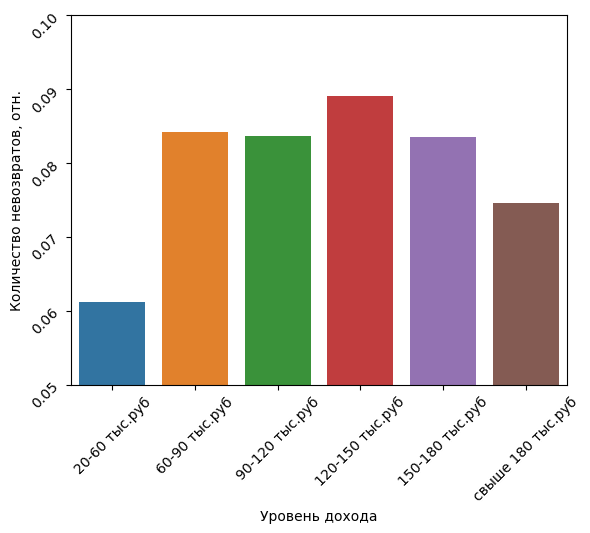

In [40]:
sns.barplot(
    data=data_total_income_pivot_new.reset_index(), 
    x='total_income_grouped', 
    y='debt', 
    order=['20-60 тыс.руб', '60-90 тыс.руб', '90-120 тыс.руб', '120-150 тыс.руб', '150-180 тыс.руб', 'свыше 180 тыс.руб'])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0.05,0.10)
plt.xlabel('Уровень дохода')
plt.ylabel('Количество невозвратов, отн.')

**Вывод:** Из графика можем сделать вывод, что уменьшение доли невозвратов характерно для групп клиентов с доходами либо менее 60 тыс.руб. либо более 180 тыс. руб.

##### Вариант 2

Используем для сравнения данные из [данного раздела](#Категоризация-данных)

Продублируем параметры группировки кредитодержателей по уровню дохода:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

Создадим сводную таблицу.

In [41]:
data_t_pivot = pd.pivot_table(data, index=['total_income_category'], values=['debt'])
data_t_pivot['total_income_category_grouped']=data['total_income_category'].value_counts()
data_t_pivot['total_income_category_debt_grouped']=data.groupby('total_income_category')['debt'].sum()
data_t_pivot_new = data_t_pivot.reindex(columns=['total_income_category_grouped', 'total_income_category_debt_grouped', 'debt'])
data_t_pivot_new.reset_index()


,total_income_category,total_income_category_grouped,total_income_category_debt_grouped,debt
0,A,25,2,0.080000
1,B,5014,354,0.070602
2,C,15921,1353,0.084982
3,D,349,21,0.060172
4,E,22,2,0.090909


Видим, что в группе A,D и E количество заемщиков значительно отличается от остальных групп (меньше). Предалагаю их не учитывать при анализе.

Уберем из таблицы эти две группы.

In [42]:
data_t_pivot_new = data_t_pivot_new.drop(data_t_pivot_new.index[0])
data_t_pivot_new = data_t_pivot_new.drop(data_t_pivot_new.index[2])
data_t_pivot_new = data_t_pivot_new.drop(data_t_pivot_new.index[2])


Построим график зависимости доли невозвратов от уровня дохода.

Text(0, 0.5, 'Количество невозвратов, отн.')

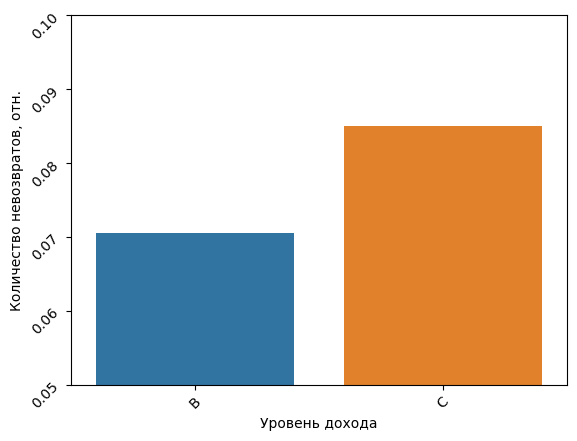

In [43]:
sns.barplot(
    data=data_t_pivot_new.reset_index(),
    x='total_income_category', 
    y='debt')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0.05,0.10)
plt.xlabel('Уровень дохода')
plt.ylabel('Количество невозвратов, отн.')

**Вывод:** Из графика можем сделать выводы:
* Клиенты из группы с доходом 50001-200000 рублей/месяц имеют наибольшую долю невозвратов кредитов.
* Клиенты из группы с дохзодом выше 200001 рубль/месяц реже невозвращают кредиты.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Посчитаем сколько всего получено кредитов На разные цели. Сохраним результаты в переменной `purpose_category_grouped`:

In [44]:
purpose_category_grouped=data['purpose_category'].value_counts()
purpose_category_grouped

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Построим сводную таблицу:

In [45]:
data_c_g_pivot = pd.pivot_table(data, index=['purpose_category'], values=['debt'])
data_c_g_pivot['purpose_category_grouped']=data['purpose_category'].value_counts()
data_c_g_pivot['purpose_category_grouped_debt']=data.groupby('purpose_category')['debt'].sum()
data_c_g_pivot_new = data_c_g_pivot.reindex(columns=['purpose_category_grouped', 'purpose_category_grouped_debt','debt'])
data_c_g_pivot_new.reset_index()# Ваш код будет здесь. Вы можете создавать новые ячейки.

,purpose_category,purpose_category_grouped,purpose_category_grouped_debt,debt
0,операции с автомобилем,4279,400,0.093480
1,операции с недвижимостью,10751,780,0.072551
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118


Построим график зависимости невозврата кредита от его цели:

Text(0, 0.5, 'Количество невозвратов, отн.')

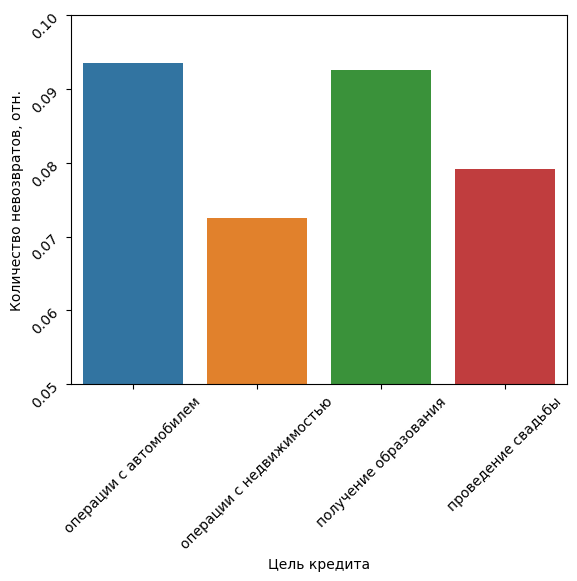

In [46]:
sns.barplot(
    data=data_c_g_pivot_new.reset_index(),
    x='purpose_category', 
    y='debt')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0.05,0.10)
plt.xlabel('Цель кредита')
plt.ylabel('Количество невозвратов, отн.')# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Из полученных данных можем сделать следующие выводы:
* Чаще всего невозвращают кредиты взятые на операции с автомобилем и получение образования.
* По операциям с недвижимостью процент возвратов выше.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Как видно из [таблицы](#Удаление-пропусков), в столбцах `days_employed` и `total_income` количество пропусков одинаково. Больше похоже на какую-то техническую ошибку.

Посмострим, чему равны минимальные значения в данных столбцах.

In [47]:
print(data['days_employed'].min())
print(data['total_income'].min())

24.14163324048118
20667


Как видим, в таблице как-будто нет людей с нулевый уровнем дохода и нулевым стажем. Предположу, что пропущенные данные могли возникнуть из-за того, что при заполнении данных для клиентов с  нулевым стажем и нулевым доходом в таблицу отдается не ноль, а пустая строка.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполенние пропусков в количественных переменных медианным значением позволяет минимизировать искажение общей картины в данных. Если использовать среднее значение, оно может сильно зависеть от выбросов (отдельных аномально больших или малых значений). Использование медианы нивелирует влияние таких выбросов.

### Шаг 4: общий вывод.

На основании полученных данных сформулируем пункты общего вывода:
* наименьший процент невозвратов у заемщиков без детей, либо с количеством детей равным трем. Линейной зависимости между количеством детей и вероятностью невозврата кредита не наблюдается;
* клиенты не состоящие в браке, либо живущие гражданским браком, чаще не возвращают кредиты;
* клиенты с доходом 50000-200000 рублей/месяц имеют наибольшую долю невозвратов кредитов. Клиенты с доходом выше 200000 рубль/месяц реже невозвращают кредиты;
* чаще всего невозвращают кредиты взятые на операции с автомобилем и получение образования. По операциям с недвижимостью процент возвратов выше.